NMFk example: Mapping variables
---

A problem demonstrating how **NMFk** can be applied to learn mapping between variables.

Applying **NMFk**, we can automatically:

- identify the number of the unknown mixed signatures in a dataset 
- estimate the shape of the unknown mixed signatures
- estimate how the signatures are mixed at each sensor

<div style="text-align: left; padding-top: 30px; padding-bottom: 30px;">
    <img src="../../logo/nmfk-logo.png" alt="NMFk" width=20% max-width=125px;/>
</div>

**NMFk** is a code within the [SmartTensors](https://github.com/SmartTensors) framework.

<div style="text-align: left; padding-top: 30px; padding-bottom: 30px;">
    <img src="../../logo/SmartTensorsNewSmall.png" alt="NMFk" width=20% max-width=125px;/>
</div>

The test problem presented here is related to predicting pressure transients observed in wells based on various attributes (e.g., well-logs, fracking stages, proppant mass, etc.) associated with the well construction.

The machine-lerning problem described here also relates to clasical `history matching` problems.

If **NMFk** is not installed, first execute in the Julia REPL: `import Pkg; Pkg.add("NMFk"); Pkg.add("Mads")`.

In [1]:
Pkg.activate()
import NMFk

ErrorException: syntax: extra token "import" after end of expression

In [2]:
import Mads

In [3]:
import Statistics

Load test matrices `A`, `B`, `X`, `Y` and `Z` that will be applied for the ML analyses presented below:

In [4]:
A = permutedims([0.168427        0.049914        0.031383        0.020747        0.007634        0.004797        0.003955
	   0.959030        0.203276        0.095674        0.043699        0.000000        0.000000        0.000000
	   0.208403        0.064995        0.039014        0.019713        0.002357        0.000000        0.000000
	   0.948621        0.217649        0.101904        0.049093        0.024234        0.012169        0.008160])

B = permutedims([0.654060        0.142989        0.043485        0.000000        0.000000        0.000000        0.000000
	   1.000000        0.090943        0.048150        0.018898        0.006329        0.001725        0.000258
	   0.076188        0.020636        0.011489        0.006166        0.002998        0.000000        0.000000
	   0.378206        0.098391        0.041083        0.009261        0.000000        0.000000        0.000000
	   0.055413        0.021730        0.010460        0.004788        0.001719        0.000000        0.000000])

X = permutedims([0.500        0.002        0.667        0.40
	   0.800        0.200        0.667        0.76
	   0.800        0.100        0.400        0.80
	   0.600        0.010        1.000        0.40])

Y = permutedims([1.000        0.600        0.267        1.00
	   0.700        0.020        0.333        0.60
	   1.000        0.020        0.200        0.72
	   0.700        1.000        0.233        0.60
	   1.000        0.060        0.133        0.80])

Z = permutedims([0.800        0.400        0.100        0.60]);

`A`: pressure transients over time observed in a group of 5 wells

`B`: pressure transients over time observed in a group of 4 wells

`X`: 4 attributes representing well properties of the group of 4 wells

`Y`: 4 attributes representing well properties of the group of 5 wells

`Z`: 4 attributes representing well properties of a new well which does not have any transient production data observed yet

Pressure matrix `A` is associated with attribute matrix `Y`.

Pressure matrix `B` is associated with attribute matrix `X`.

Pressure transients over time observed in the group of 5 wells (matrix `A`) are:


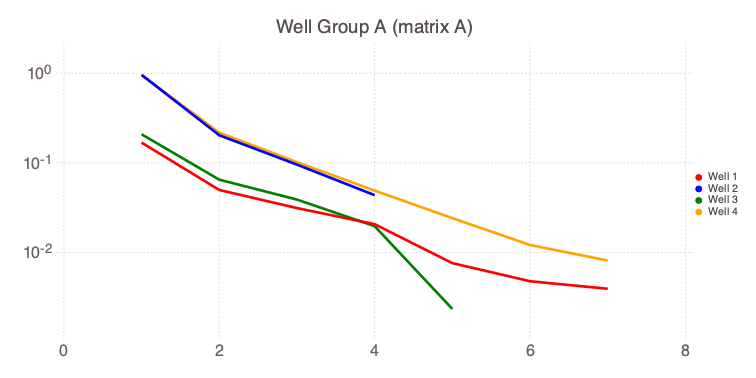

In [5]:
Mads.plotseries(A; name="Well", logy=true, title="Well Group A (matrix A)")

Pressure transients over time observed in the group of 4 wells (matrix `B`) are:

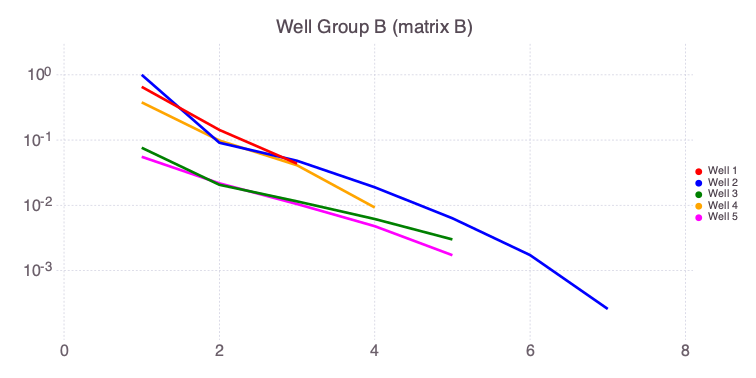

In [6]:
Mads.plotseries(B; name="Well", logy=true, title="Well Group B (matrix B)")

Well attributes for the group of 5 wells (matrix `Y`) are:



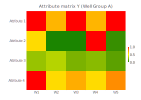

In [7]:
NMFk.plotmatrix(Y; title="Attribute matrix Y (Well Group A)", xticks=["W$i" for i=1:5], yticks=["Attribute $i" for i=1:4])

Well attributes for the group of 4 wells (matrix X) are:

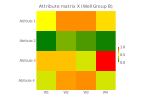

In [8]:
NMFk.plotmatrix(X; title="Attribute matrix X (Well Group B)", xticks=["W$i" for i=1:4], yticks=["Attribute $i" for i=1:4])

We learn how the well attributes associated with the 2 well groups are related.

We achieve this by discovering how the `X` and `Y` matrices are mapped.

After that we can apply the discovered mapping betweent the `X` and `Y` matrices (i.e., well attributes) to predict the transients.

The ML analyses is performed as follows:

In [9]:
W, H, of, sil, aic = NMFk.mapping(X, Y, A, B; method=:ipopt, save=false);

┌ Info: Mapping matrix size: 4 x 5
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkMapping.jl:51


The extracted mapping betweenn the `X` and `Y` matrices is encoded in `H`.

We use now the mapping `H` and known transients of wells in group `A` (matrix `A`) to predict transients of the well in group `B`.

In this case, we assume that none of the transinets of well in group are known; this is completely blind prediction.

The prediction error is:



In [10]:
NMFk.normnan(B .- (A * H))

1.032261490452482

Blind predictions of the transients for the 5 wells (Group `B`) based on the transinets of the 4 wells (Group `A`) are:

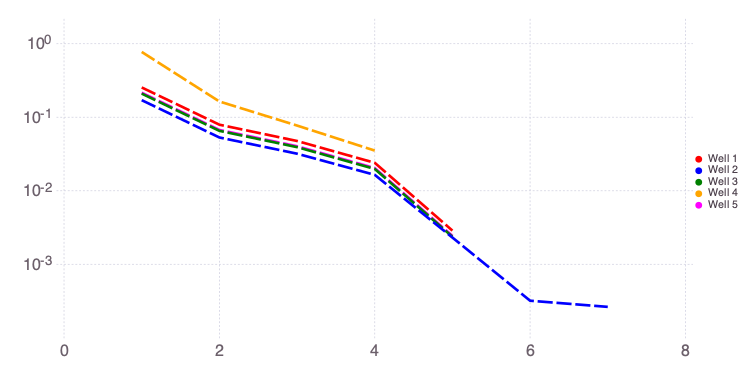

In [11]:
Mads.plotseries(A * H; logy=true, name="Well", linestyle=:dash)

Blind predictions of the transients for the 5 wells (dashed lines) are compared against the true values (solid lines):

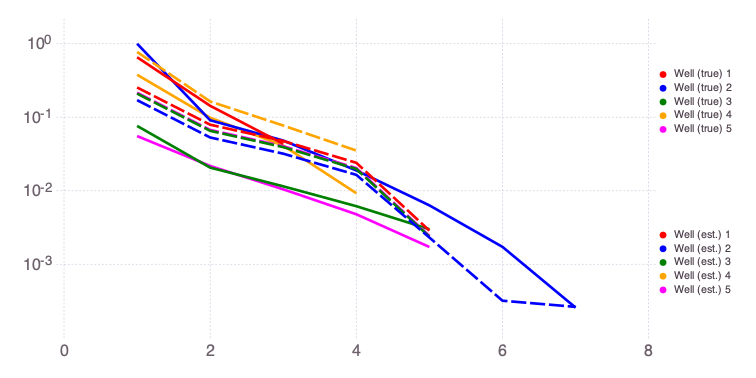

In [12]:
Mads.plotseries(A * H; linestyle=:dash, name="Well (est.)", logy=true, gl=Mads.plotseries(B; name="Well (true)", code=true, quiet=true))